In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

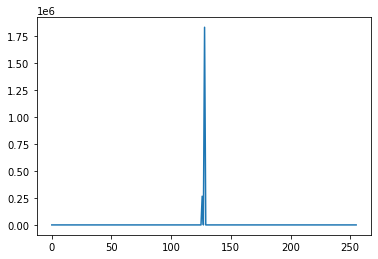

In [4]:
raw_sudoko_image = cv2.imread('sudoku.tif')
raw_sudoko_image = cv2.cvtColor(raw_sudoko_image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([raw_sudoko_image], [0], None, [256], [0, 256])
plt.plot(hist)

True

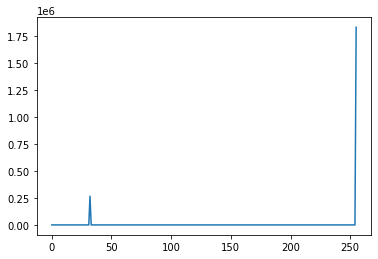

In [6]:
equ = cv2.equalizeHist(raw_sudoko_image)
hist = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.plot(hist)
cv2.imwrite('result.jpg', equ)

In [8]:
rows, cols = equ.shape
img = equ

In [16]:
new_img = np.zeros((1199, 1199), dtype="uint8")
new_img = img[150:1349, 172:1371]
cv2.imwrite('result2.jpg', new_img)

True

In [122]:
squares = []
square = np.zeros((119, 119), dtype='uint8')

flag = 0
color = 0
i = 0
while i < new_img.shape[0]:
    for j in range(new_img.shape[1]):
        if color == 0 and new_img[i, j] > 250:
            square = new_img[i:i+119, j:j+119]
            squares.append(square)
            color = 1
            flag = 1
        if color == 1 and new_img[i, j] < 50:
            color =  0
    if flag == 1:
        i += 132
        flag = 0
    i += 1

In [123]:
len(squares)

81

In [133]:
for i in range(len(squares)):
    squ = squares[i]
    
    for ii in range(squ.shape[0]):
        error_flag = 1
        for jj in range(squ.shape[1]):
            if squ[ii, jj] == 255:
                error_flag = 0
                break
        if error_flag == 1:
            squ[ii, :] = 255
    
    hist = cv2.calcHist([squ], [0], None, [256], [0, 256])
    if sum(hist[:-1]) > 900:
        cv2.imwrite(f"squ/{i}.jpg", squ)